In [1]:
#Install packages
import numpy as np

#end to end ML project
1. Frame the problem and look at the big picture
1.5 select performance measure: AUC and ALIFT
AUC/ROC plots TPR against FPR (where 0.5 is random guessing)
ALIFT measures improvement inpredict Postitive instance compared to random guessing (often used in marketing campaigns)

2. Get the data
2.8 Convert data to pandas
2.10 Check datatype 
2.11 set test-set aside

3. Explore the data
3.1 create a copy of the data
3.2 create a jupyter notebook
3.3  study attributes and characteristics
3.4 identify target attribute
3.5. vizualize data
3.6 Study correclations between attributes
3.7 study how to solve the problem manually
3.8 identiy extra data that could be useful
3.10 document waht is learned

4 Prepare the data



In [2]:
## Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # plotting library
import pandas as pd
from ucimlrepo import fetch_ucirepo #for importing dataset
import matplotlib as plt

## Distribution fitting
from scipy import stats

In [3]:
# 2.8-2.11  Get the data, convert (if needed) to pandas, check the datatype, set dataset asided
#Import dataset

  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
#2.10 check the datatype
print(type(X))
print(type(y))
print(y.shape)
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(45211, 1)
(45211, 16)


In [5]:

#3.1 create a copy of the data-DONE
#3.2 create a jupyter notebook-DONE
#3.3  study attributes and characteristics
#3.4 identify target attribute
#3.5. vizualize data
#3.6 Study correclations between attributes
#3.7 study how to solve the problem manually
#3.8 identiy extra data that could be useful
#3.10 document waht is learned


In [6]:
#3.1 create a copy of the data
X_original=X
y_original=y

In [7]:
#3.2 create a jupyter notebook
#telemarketing_vX.ipynb

In [8]:
#3.3  study attributes and characteristics
X.shape
y.shape
print(X.shape)
print(y.shape)

(45211, 16)
(45211, 1)


In [9]:
#3.3  study attributes and characteristics
X.head(5)

#conclusion: dat in readable format, column header contains understnadable names

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [10]:
y.head()
#conclusion: dat in readable format, value contains answer on binary classification (target)

,y
0,no
1,no
2,no
3,no
4,no


In [11]:
#3.3  study attributes and characteristics
X.info()
print(X.info)
y.info
print(y.info)

#conclusion, set contains  45211  rows and 16 columns , NAN exists , dtype object and int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB
<bound method DataFrame.info of        age           job   marital  education default  balance housing 

In [12]:
#3.3  study attributes and characteristics

X.describe

#conclusion-None

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [13]:
#3.3  study attributes and characteristics-list all columns
columns=X.columns
print(columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [14]:
#3.3  study attributes and characteristics-list all columns # Count the unique values in the "education" column
educations = X["education"].value_counts()

# Print each unique value and its count separately for "education"
print("Education counts:")
for education, count in educations.items():
    print(f"{education}: {count}")

# Count the unique values in the "job" column
jobs = X["job"].value_counts()

# Print each unique value and its count separately for "job"
print("\nJob counts:")
for job, count in jobs.items():
    print(f"{job}: {count}")

# Count the unique values in the "jmartial" column
martials = X["marital"].value_counts()

# Print each unique value and its count separately for "jmartial"
print("\nmartial counts:")
for martial, count in martials.items():
    print(f"{martial}: {count}")

# Count the unique values in the "default" column
defaults = X["default"].value_counts()

# Print each unique value and its count separately for "defaults"
print("\ndefault counts:")
for default, count in defaults.items():
    print(f"{default}: {count}")

# Count the unique values in the "default" column
contacts = X["contact"].value_counts()

# Print each unique value and its count separately for "contact"
print("\ncontact counts:")
for contact, count in contacts.items():
    print(f"{contact}: {count}")

# Count the unique values in the "default" column
previouses = X["previous"].value_counts()

# Print each unique value and its count separately for "contact"
print("\nprevious counts:")
for previous, count in previouses.items():
    print(f"{previous}: {count}")


Education counts:
secondary: 23202
tertiary: 13301
primary: 6851

Job counts:
blue-collar: 9732
management: 9458
technician: 7597
admin.: 5171
services: 4154
retired: 2264
self-employed: 1579
entrepreneur: 1487
unemployed: 1303
housemaid: 1240
student: 938

martial counts:
married: 27214
single: 12790
divorced: 5207

default counts:
no: 44396
yes: 815

contact counts:
cellular: 29285
telephone: 2906

previous counts:
0: 36954
1: 2772
2: 2106
3: 1142
4: 714
5: 459
6: 277
7: 205
8: 129
9: 92
10: 67
11: 65
12: 44
13: 38
15: 20
14: 19
17: 15
16: 13
19: 11
23: 8
20: 8
18: 6
22: 6
24: 5
27: 5
29: 4
21: 4
25: 4
30: 3
26: 2
37: 2
28: 2
38: 2
51: 1
275: 1
58: 1
32: 1
40: 1
55: 1
35: 1
41: 1


outcome y counts:
         y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]: 39922
         y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]: 5289


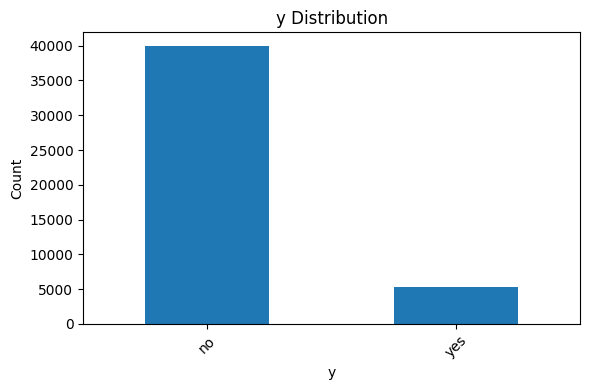

Education counts:
secondary: 23202
tertiary: 13301
primary: 6851


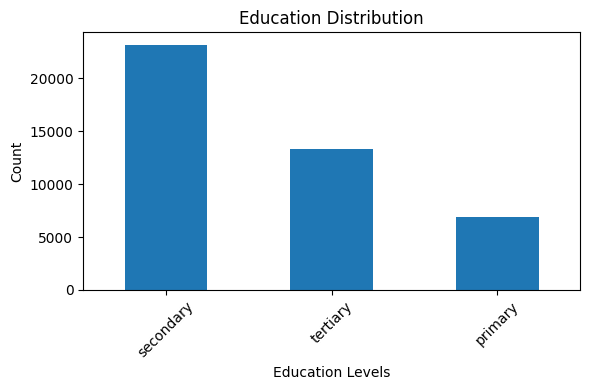


Job counts:
blue-collar: 9732
management: 9458
technician: 7597
admin.: 5171
services: 4154
retired: 2264
self-employed: 1579
entrepreneur: 1487
unemployed: 1303
housemaid: 1240
student: 938


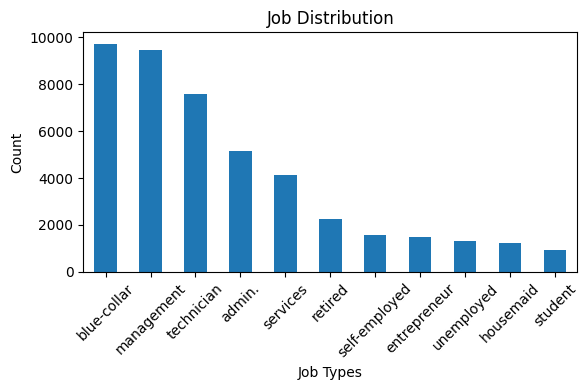


Marital counts:
married: 27214
single: 12790
divorced: 5207


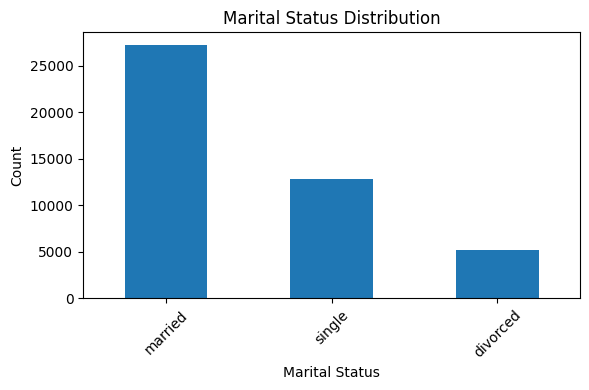


default counts:
no: 44396
yes: 815


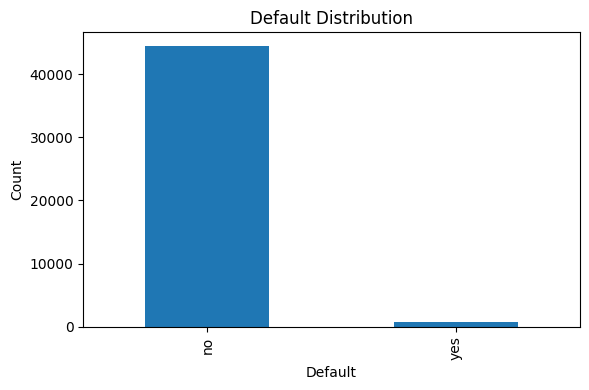


Contact counts:
cellular: 29285
telephone: 2906


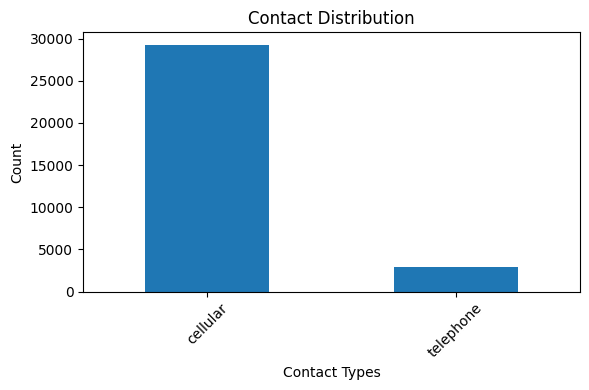


Previous counts:
0: 36954
1: 2772
2: 2106
3: 1142
4: 714
5: 459
6: 277
7: 205
8: 129
9: 92
10: 67
11: 65
12: 44
13: 38
15: 20
14: 19
17: 15
16: 13
19: 11
23: 8
20: 8
18: 6
22: 6
24: 5
27: 5
29: 4
21: 4
25: 4
30: 3
26: 2
37: 2
28: 2
38: 2
51: 1
275: 1
58: 1
32: 1
40: 1
55: 1
35: 1
41: 1


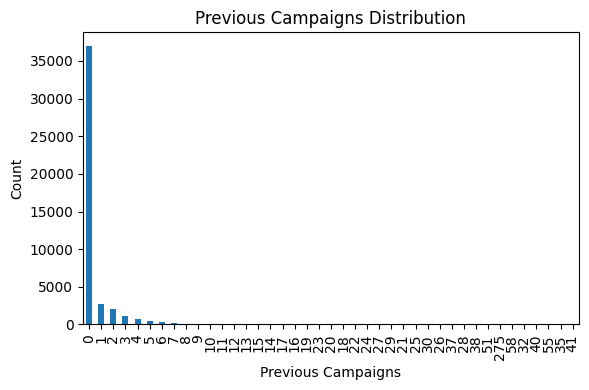

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your dataset
# educations = X["education"].value_counts()

# Print and visualize "y outcome of a bank deposit sale" counts
educations = y["y"].value_counts()
print("outcome y counts:")
for education, count in educations.items():
    print(f"{y}: {count}")
# Histogram for education
plt.figure(figsize=(6, 4))
educations.plot(kind='bar')
plt.title('y Distribution')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Print and visualize "education" counts
educations = X["education"].value_counts()
print("Education counts:")
for education, count in educations.items():
    print(f"{education}: {count}")
# Histogram for education
plt.figure(figsize=(6, 4))
educations.plot(kind='bar')
plt.title('Education Distribution')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print and visualize "job" counts
jobs = X["job"].value_counts()
print("\nJob counts:")
for job, count in jobs.items():
    print(f"{job}: {count}")
# Histogram for job
plt.figure(figsize=(6, 4))
jobs.plot(kind='bar')
plt.title('Job Distribution')
plt.xlabel('Job Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print and visualize "marital" counts
martials = X["marital"].value_counts()
print("\nMarital counts:")
for martial, count in martials.items():
    print(f"{martial}: {count}")
# Histogram for marital status
plt.figure(figsize=(6, 4))
martials.plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print and visualize "default" counts
defaults = X["default"].value_counts()
print("\ndefault counts:")
for default, count in defaults.items():
    print(f"{default}: {count}")
# Histogram for default
plt.figure(figsize=(6, 4))
defaults.plot(kind='bar')
plt.title('Default Distribution')
plt.xlabel('Default')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print and visualize "contact" counts
contacts = X["contact"].value_counts()
print("\nContact counts:")
for contact, count in contacts.items():
    print(f"{contact}: {count}")
# Histogram for contact
plt.figure(figsize=(6, 4))
contacts.plot(kind='bar')
plt.title('Contact Distribution')
plt.xlabel('Contact Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print and visualize "previous" counts
previouses = X["previous"].value_counts()
print("\nPrevious counts:")
for previous, count in previouses.items():
    print(f"{previous}: {count}")
# Histogram for previous
plt.figure(figsize=(6,4))
previouses.plot(kind='bar')
plt.title('Previous Campaigns Distribution')
plt.xlabel('Previous Campaigns')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [16]:
#3.3  study attributes and characteristics-list all columns-describe
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


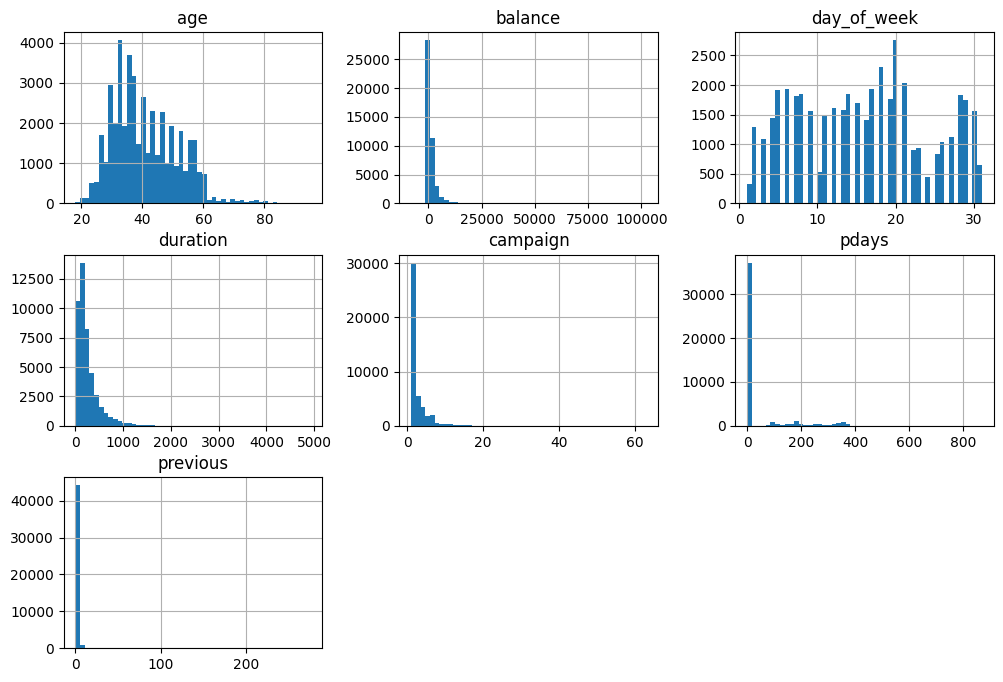

In [17]:
#3.3  study attributes and characteristics-plot histograms
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(12, 8))
plt.show()

#conclusion. 
# Days_of_week is the day in month, not weekday. 
# Duration is in second @follow up action, make duration in minutes
#Prevoius (duration of previous calls) needs further investigation @check uniqe values
#data may be capped, example Previous (length of previous call in s). Suggest tree-based model which is less sensitive to capped data
#many right skewed distributions



In [18]:
#3.3  overview feature characteristics, check if column preivous contains many values of extreme values
#  Get unique values in the 'previous' column
unique_previous = X['previous'].unique()
print("Unique values in 'previous':", unique_previous)

# Count occurrences of each unique value
previous_counts = X['previous'].value_counts()
print("\nCounts of unique values in 'previous':\n", previous_counts)
#conclusion, the value 275 may be an single outlier-the values by far exeeds the closest value 58

Unique values in 'previous': [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]

Counts of unique values in 'previous':
 previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


            Feature Type  Missing (%)         Distribution  Outliers (Noise)
age              Integer     0.000000  Normal or symmetric             381.0
balance          Integer     0.000000         Right skewed             745.0
campaign         Integer     0.000000         Right skewed             840.0
contact      Categorical    28.798301                  NaN               NaN
day_of_week      Integer     0.000000  Normal or symmetric               0.0
default      Categorical     0.000000                  NaN               NaN
duration         Integer     0.000000         Right skewed             963.0
education    Categorical     4.107407                  NaN               NaN
housing      Categorical     0.000000                  NaN               NaN
job          Categorical     0.637013                  NaN               NaN
loan         Categorical     0.000000                  NaN               NaN
marital      Categorical     0.000000                  NaN               NaN

/tmp/ipykernel_1754/2469439419.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':


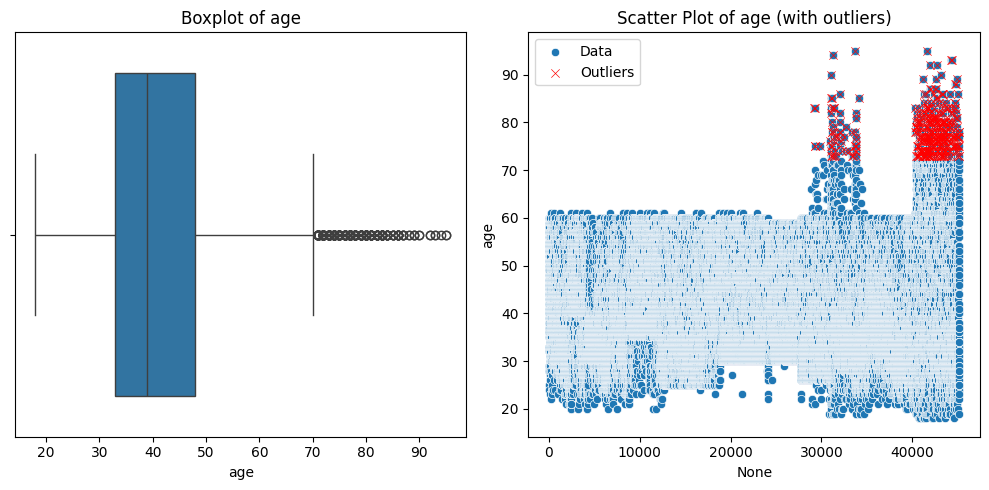

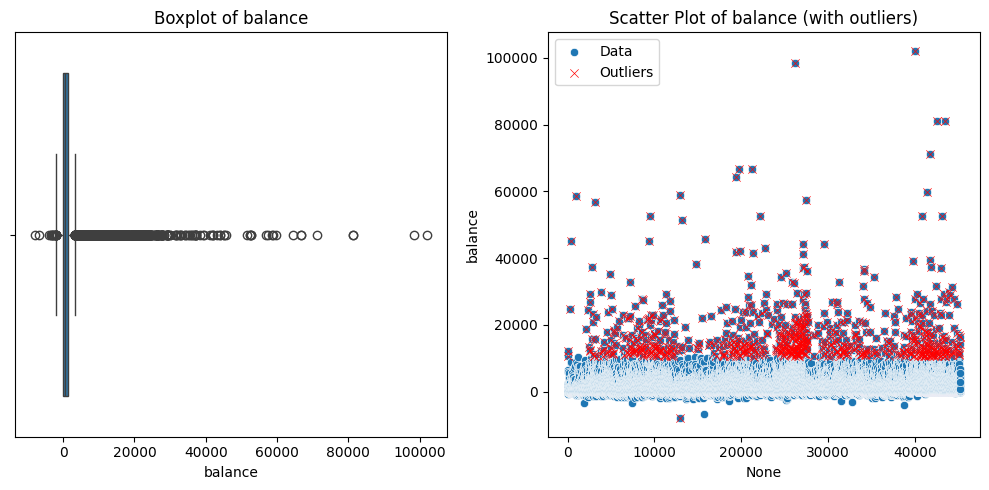

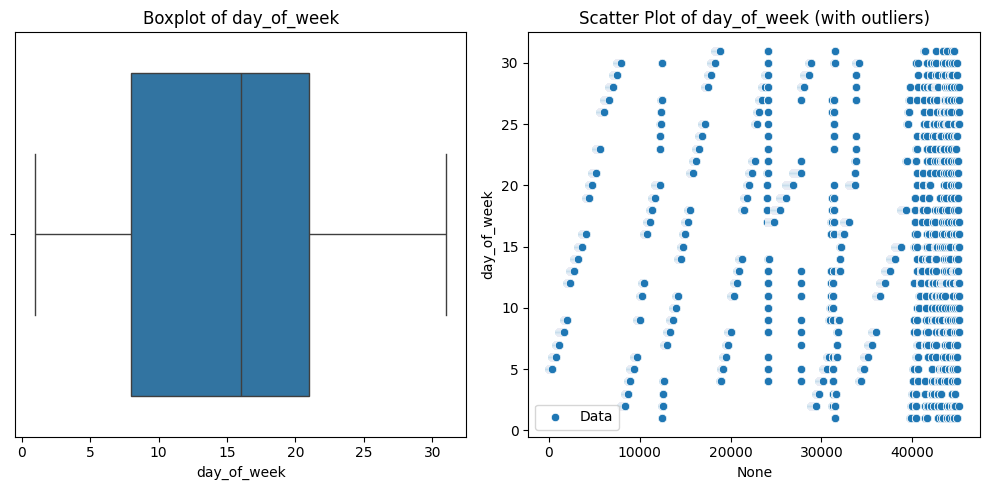

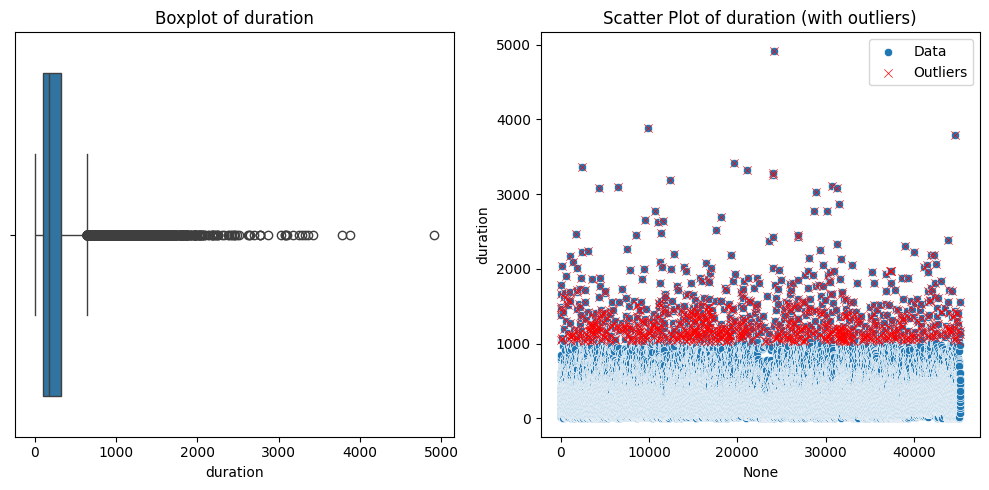

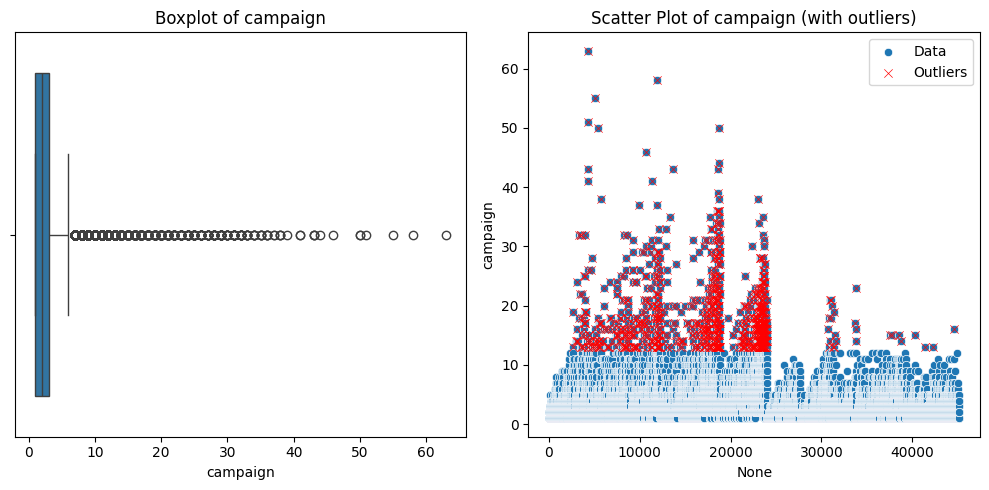

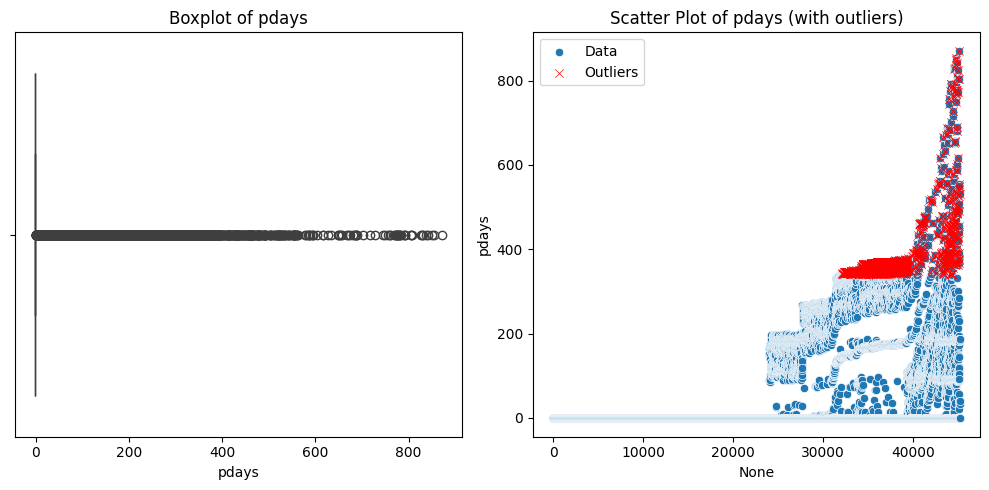

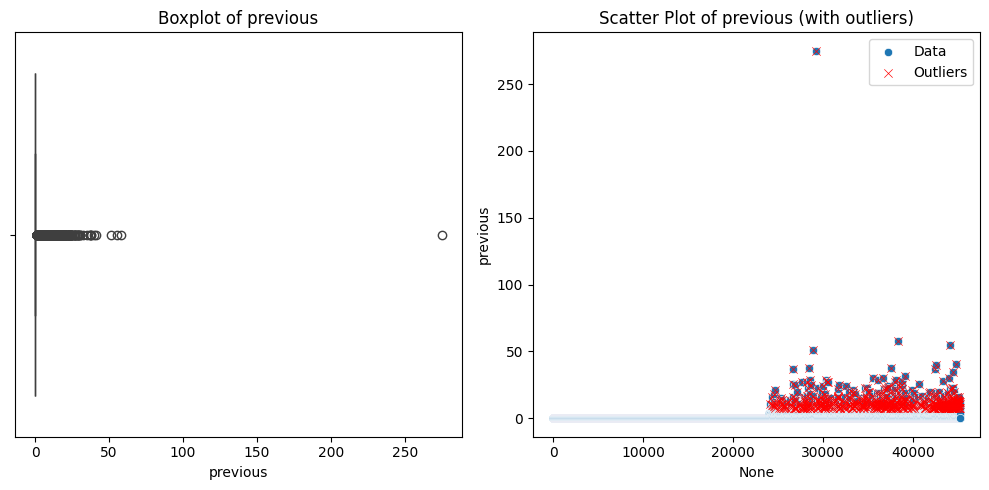

In [19]:
#3.3 overview feature characteristics

import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to determine feature type
def get_feature_types(df):
    types = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if pd.api.types.is_integer_dtype(df[col]):
                types[col] = 'Integer'
            else:
                types[col] = 'Float'
        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
            types[col] = 'Categorical'
        else:
            types[col] = 'Other'
    return types

# Helper function to get percentage of missing values
def get_missing_percentage(df):
    return df.isnull().mean() * 100

# Helper function to detect distribution type (based on skewness)
def get_distribution_type(df):
    distribution_info = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only for numerical columns
        col_skewness = skew(df[col].dropna())
        if col_skewness > 1:
            distribution_info[col] = 'Right skewed'
        elif col_skewness < -1:
            distribution_info[col] = 'Left skewed'
        else:
            distribution_info[col] = 'Normal or symmetric'
    return distribution_info

# Helper function to detect noise (outliers based on z-score)
def detect_noise(df):
    noise_info = {}
    for col in df.select_dtypes(include=[np.number]).columns:  # Only for numerical columns
        col_mean = np.mean(df[col])
        col_std = np.std(df[col])
        z_scores = (df[col] - col_mean) / col_std
        outliers = z_scores[np.abs(z_scores) > 3]  # Z-score threshold of 3 for outliers
        noise_info[col] = len(outliers)  # Number of outliers detected
    return noise_info

# Visualize the outliers using boxplots and scatter plots
def visualize_noise(df):
    # Only visualize numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        
        # 1. Boxplot to visualize outliers
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        # 2. Scatter plot to show outliers (with Z-score > 3)
        plt.subplot(1, 2, 2)
        col_mean = np.mean(df[col])
        col_std = np.std(df[col])
        z_scores = (df[col] - col_mean) / col_std
        
        # Identify outliers
        outliers = df[np.abs(z_scores) > 3]
        sns.scatterplot(x=df.index, y=df[col], label='Data')
        sns.scatterplot(x=outliers.index, y=outliers[col], color='red', label='Outliers', marker='x')
        plt.title(f'Scatter Plot of {col} (with outliers)')
        
        plt.tight_layout()
        plt.show()

# Build a DataFrame with all the information
def summarize_dataset(df):
    # 1. Feature Types
    feature_types = get_feature_types(df)

    # 2. Percentage of Missing Values
    missing_percentage = get_missing_percentage(df)

    # 3. Distribution Type (Skewness)
    distribution_types = get_distribution_type(df)

    # 4. Noise Detection (Outliers)
    noise_info = detect_noise(df)

    # Create a DataFrame to hold all the information
    summary = pd.DataFrame({
        'Feature Type': pd.Series(feature_types),
        'Missing (%)': pd.Series(missing_percentage),
        'Distribution': pd.Series(distribution_types),
        'Outliers (Noise)': pd.Series(noise_info)
    })

    return summary

# Assuming X is your DataFrame
summary_df = summarize_dataset(X)
print(summary_df)

# Visualize the noise (outliers) in the dataset
visualize_noise(X)


#Conclusion, many right skweded distributions, 
# many missing values in contacts and poutcocme
#Noise/outliers in several features


In [35]:
#Pairplot and encode categorical  features against target variable y

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Separating the features into categorical, numerical, and target
categorical_cols = combined_data.select_dtypes(include=['object']).columns.tolist()

# Get the numerical columns
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude 'y' from the numerical columns, if it's present
if 'y' in numerical_cols:
    numerical_cols.remove('y')


# Define preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Apply transformations (only to features, not the target 'y')
X = combined_data.drop('y', axis=1)  # Features (without target)
y = combined_data['y']  # Target variable

# Fit and transform the features
processed_X = preprocessor.fit_transform(X)

# Convert processed_X to a DataFrame with appropriate column names
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
processed_df = pd.DataFrame(processed_X, columns=numerical_cols + list(encoded_cat_cols))

# Add the target 'y' back into the processed DataFrame for visualization
processed_df['y'] = y.values

# Plot the pairwise relationships between all features and the target variable 'y'
# We'll use 'hue' to visually distinguish the target variable
sns.pairplot(processed_df, hue='y')
plt.show()



ValueError: A given column is not a column of the dataframe

In [20]:
#3.4 Target variable is y (categorical: Yes/No)

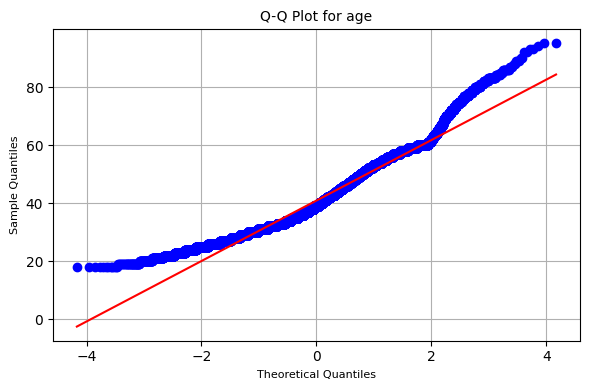

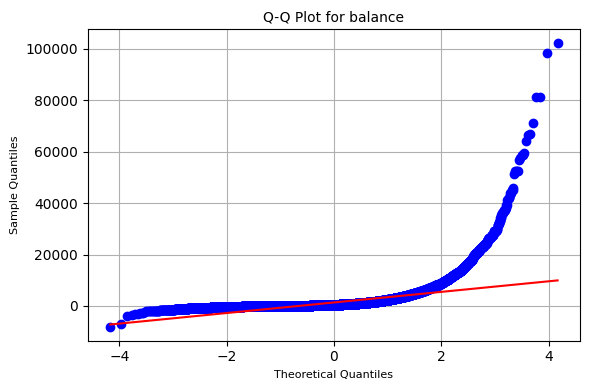

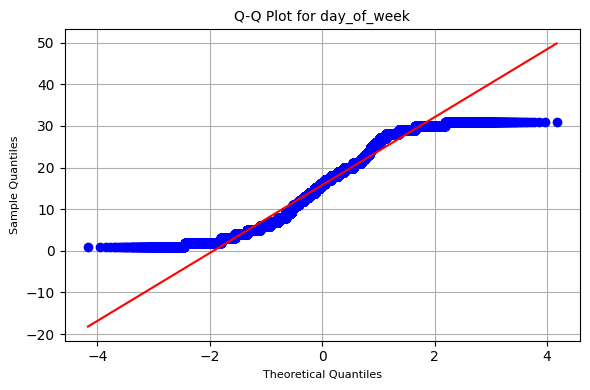

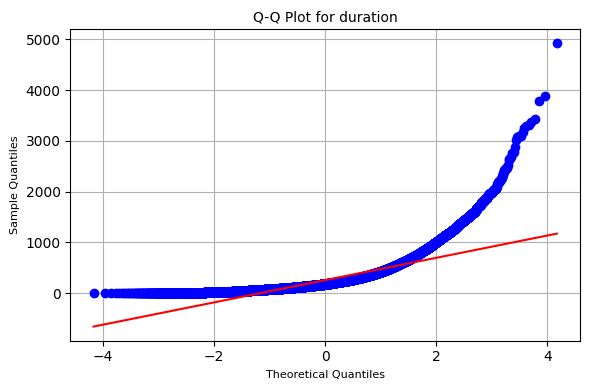

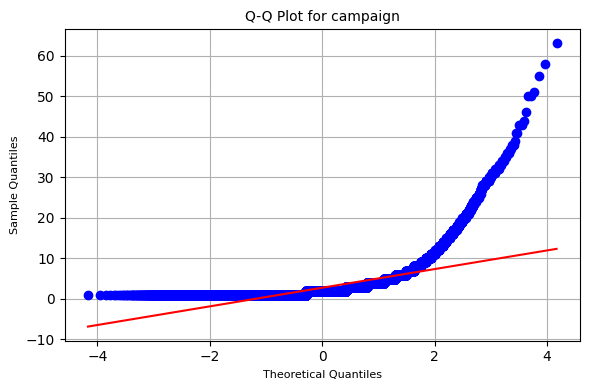

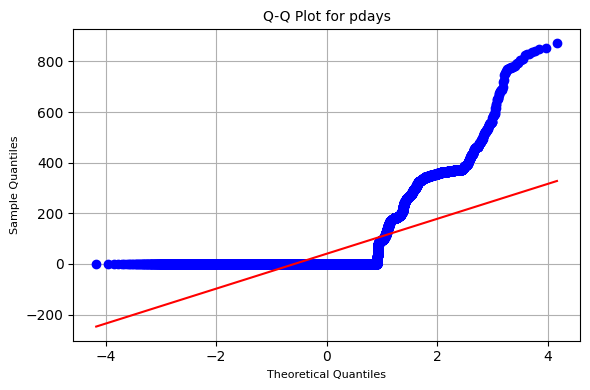

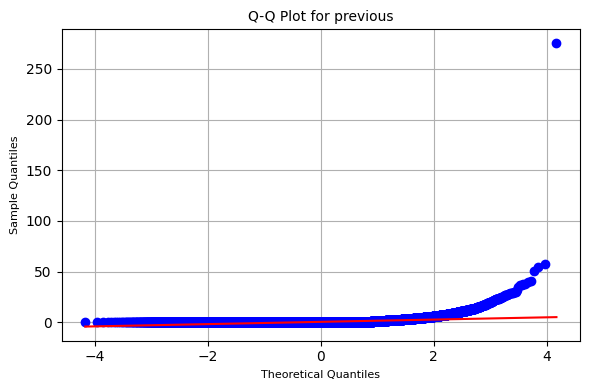

In [21]:
#3.5 Vizualise the data Q-Q plots

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



# Function to plot Q-Q plots for all numerical columns with smaller size
def qq_plot_all_numerical(data):
    # Select numerical columns only
    numerical_cols = data.select_dtypes(include=[np.number])

    # Generate Q-Q plot for each numerical column
    for col in numerical_cols.columns:
        plt.figure(figsize=(6, 4))  # Adjust the figure size (width=6, height=4)
        stats.probplot(numerical_cols[col], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {col}', fontsize=10)
        plt.xlabel('Theoretical Quantiles', fontsize=8)
        plt.ylabel('Sample Quantiles', fontsize=8)
        plt.grid(True)
        plt.tight_layout()  # Ensure layout fits well
        plt.show()

# Assuming your dataset is loaded into a DataFrame X
qq_plot_all_numerical(X)

#Conclusion,none of the numerical features are linear distributed, outliers identified in 'previous'

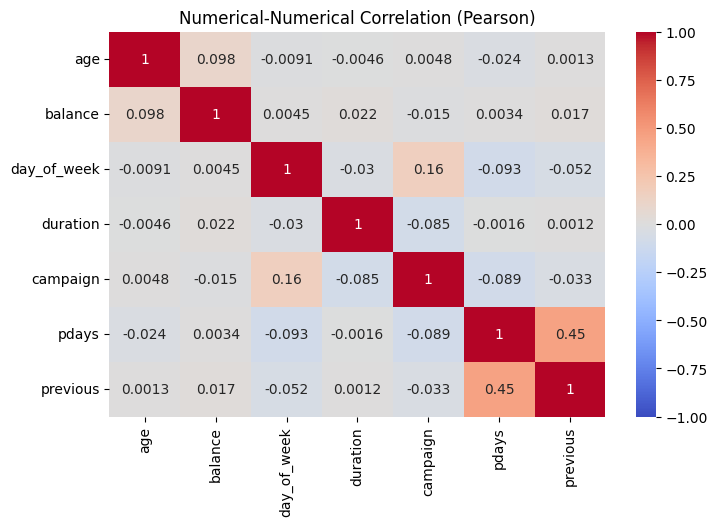

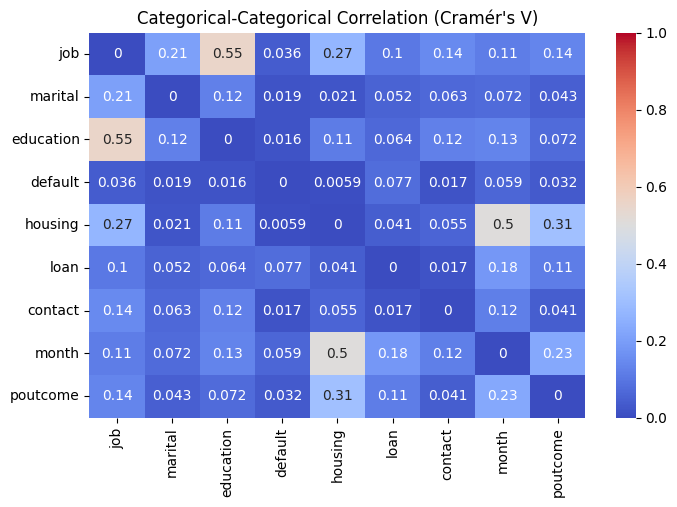

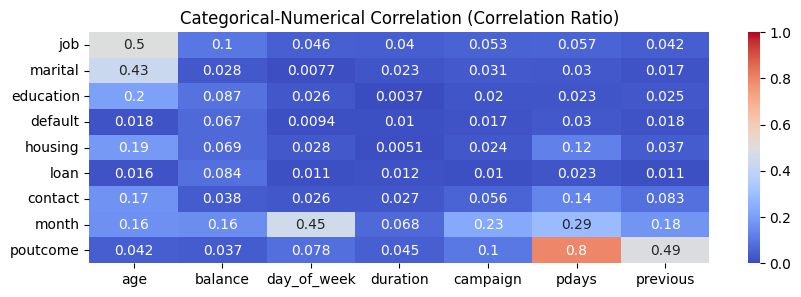

In [22]:
#3.6 correlations between data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V for categorical-categorical correlation
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Function to calculate Correlation Ratio (Eta squared) for categorical-numerical correlation
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_means = np.zeros(np.max(fcat) + 1)
    for i in range(np.max(fcat) + 1):
        cat_means[i] = np.mean(values[fcat == i])
    overall_mean = np.mean(values)
    numerator = np.sum([(len(values[fcat == i]) * (cat_means[i] - overall_mean) ** 2) for i in range(np.max(fcat) + 1)])
    denominator = np.sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

# 1. Heatmap for Numerical-Numerical Correlations (Pearson)
numerical_corr = X[numerical_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical-Numerical Correlation (Pearson)')
plt.show()

# 2. Heatmap for Categorical-Categorical Correlations (Cramér's V)
categorical_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for cat1 in categorical_columns:
    for cat2 in categorical_columns:
        if cat1 != cat2:
            categorical_corr.loc[cat1, cat2] = cramers_v(X[cat1], X[cat2])

# Convert the categorical correlation matrix to numeric and fill NaNs with zeros for self-correlation
categorical_corr = categorical_corr.astype(float).fillna(0)

plt.figure(figsize=(8, 5))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Categorical-Categorical Correlation (Cramér\'s V)')
plt.show()

# 3. Heatmap for Categorical-Numerical Correlations (Correlation Ratio)
cat_num_corr = pd.DataFrame(index=categorical_columns, columns=numerical_columns)

for cat in categorical_columns:
    for num in numerical_columns:
        cat_num_corr.loc[cat, num] = correlation_ratio(X[cat], X[num])

# Convert to numeric and fill NaNs
cat_num_corr = cat_num_corr.astype(float).fillna(0)

plt.figure(figsize=(10, 3))
sns.heatmap(cat_num_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Categorical-Numerical Correlation (Correlation Ratio)')
plt.show()

#Conclusion-none of the features are very high correlated with other features, only poutcome (outcome of the previous marketing campaign)
# and pday (number of days that passed by after the client was last contacted from a previous campaign)
# having a correlation of >=0.8



In [25]:
#3.6 correlations between data inlcuding target variable y-combine data
# Join X and y into a single DataFrame
combined_data = pd.concat([X, y], axis=1)

# Print the first few rows of the combined dataset to check
print(combined_data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


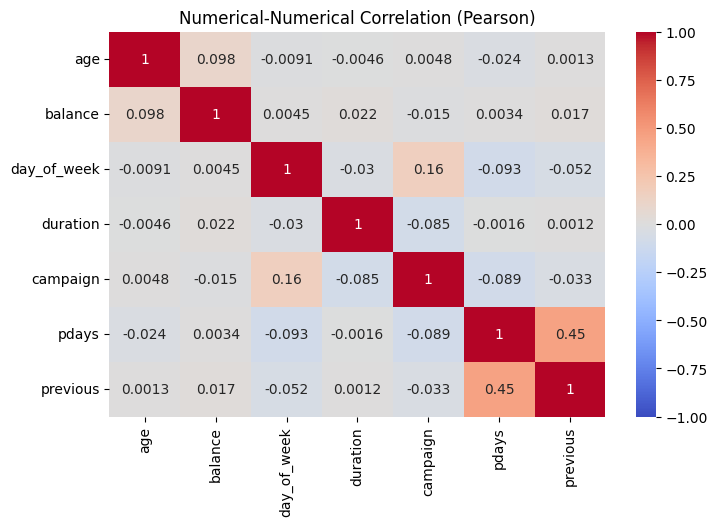

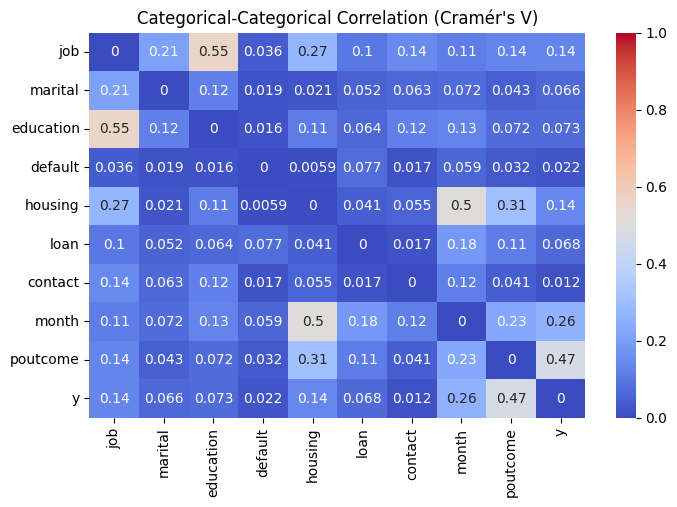

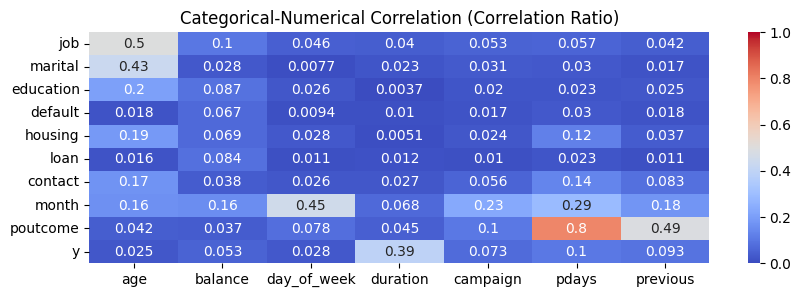

In [26]:
#3.6 correlations between data inlcuding target variable y



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency



# Function to calculate Cramér's V for categorical-categorical correlation
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Function to calculate Correlation Ratio (Eta squared) for categorical-numerical correlation
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_means = np.zeros(np.max(fcat) + 1)
    for i in range(np.max(fcat) + 1):
        cat_means[i] = np.mean(values[fcat == i])
    overall_mean = np.mean(values)
    numerator = np.sum([(len(values[fcat == i]) * (cat_means[i] - overall_mean) ** 2) for i in range(np.max(fcat) + 1)])
    denominator = np.sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Identify categorical and numerical columns
categorical_columns = combined_data.select_dtypes(include=['object', 'category']).columns
numerical_columns = combined_data.select_dtypes(include=[np.number]).columns

# 1. Heatmap for Numerical-Numerical Correlations (Pearson)
numerical_corr = combined_data[numerical_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numerical-Numerical Correlation (Pearson)')
plt.show()

# 2. Heatmap for Categorical-Categorical Correlations (Cramér's V)
categorical_corr = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for cat1 in categorical_columns:
    for cat2 in categorical_columns:
        if cat1 != cat2:
            categorical_corr.loc[cat1, cat2] = cramers_v(combined_data[cat1], combined_data[cat2])

# Convert the categorical correlation matrix to numeric and fill NaNs with zeros for self-correlation
categorical_corr = categorical_corr.astype(float).fillna(0)

plt.figure(figsize=(8, 5))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Categorical-Categorical Correlation (Cramér\'s V)')
plt.show()

# 3. Heatmap for Categorical-Numerical Correlations (Correlation Ratio)
cat_num_corr = pd.DataFrame(index=categorical_columns, columns=numerical_columns)

for cat in categorical_columns:
    for num in numerical_columns:
        cat_num_corr.loc[cat, num] = correlation_ratio(combined_data[cat], combined_data[num])

# Convert to numeric and fill NaNs
cat_num_corr = cat_num_corr.astype(float).fillna(0)

plt.figure(figsize=(10, 3))
sns.heatmap(cat_num_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Categorical-Numerical Correlation (Correlation Ratio)')
plt.show()

#Conclusion-none of the features are very high correlated with other features, only poutcome (outcome of the previous marketing campaign)
# and pday (number of days that passed by after the client was last contacted from a previous campaign)
# having a correlation of >=0.8

#Most promising values (correlation with target y), categorical: poutcome, month (last contact month of year) housing, job
#Most promising values (correlation with target y), numerial: duration, pdays (number of days that passed by after the client was last contacted from a previous campaign), previous (number of contacts performed before this campaign and for this client)


In [25]:
#3.8  transformationation to apply in step 4-Prepare the data
#transform skweded distributions

In [26]:
#3.9 missing data, none

3.10 conclusion 3:Data exploration
#2.10 check the datatype
#Pandas


#conclusion: dat in readable format, column header contains understnadable names
#conclusion: dat in readable format, value contains answer on binary classification (target)

#3.3  study attributes and characteristics
#conclusion: dat in readable format, column header contains understnadable names
#conclusion, set contains  45211  rows and 16 columns , NAN exists , dtype object and int64
#conclusion: dat in readable format, value contains answer on binary classification (target)
Columns in feature set
'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'


3.3 plot histograms
#conclusion. 
#Days_of_week is the day in month, not weekday. 
#Duration is in second @follow up action, make duration in minutes
#Prevoius (duration of previous calls) needs further investigation @check uniqe values
#data may be capped, example Previous (length of previous call in s). Suggest tree-based model which is less sensitive to capped data
#many right skewed distributions

#3.4 Target variable is y (categorical Yes/No)

#3.5 Vizualise the data Q-Q plots
#Conclusion,none of the numerical features are linear distributed, outliers identified in 'previous'

#3.6 correlations between data
#Conclusion-none of the features are very high correlated with other features, only poutcome (outcome of the previous marketing campaign)
#and pday (number of days that passed by after the client was last contacted from a previous campaign)
#having a correlation of >=0.8

Suggested transformation
#transform skweded distribution, log transform: balanceduration, pdays , campaign
#drop column with many nans : poutcome, 
#drop columns duration since it is a feature that cannot be estimated before the call take place
#conside dropping rows with  education NANS  , since it relative few NANS <5%), since education has a correlation with taget varable y (correlation ratio 0.073 cramers v, Very weak association) but a sstronger orrelation with jobs-keep jobs for the crude model
#replace NAN values with 'unknown'for featue 'contact', feature contains approx 20% real values and 80% NANS, since feature  is correlated with target y (altrhough low, r=0.012)  and keep the feature for model training

#suggested variables for crude model against target y
#Most promising values (correlation with target y), categorical:  job
#Most promising values (correlation with target y), numerical: pdays (number of days that passed by after the client was last contacted from a previous campaign), 

# Split train  and  test set
Since the data is colleceted over 5 years, the training and test set will be shuffled, to avoid using a specific time period for test/train. If the time period chosen for test data contains data affected by a specific event in this period, the test data may be biased and vie versa with the training set

In [27]:
#Drop NaNs and Splitting: Drop NaNs from the dataset btogether with  splitting into training and test sets. This way, both sets are drawn from the cleaned data.
#handle NANs
# Count the number of NaN values per column
nan_counts = X.isnull().sum()
print("Number of NaN values per column X:\n", nan_counts)

nan_counts = y.isnull().sum()
print("Number of NaN values per column y:\n", nan_counts)
#Conclusion: Drop columns poutcome (many NANs, low )

Number of NaN values per column X:
 age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64
Number of NaN values per column y:
 y    0
dtype: int64


In [28]:
#Drop the columns containing the nans and split the dataset in train and test

import pandas as pd
from sklearn.model_selection import train_test_split

# 0. Replace NaNs in 'contact' with 'unknown'
X['contact'].fillna('unknown', inplace=True)

# Split dataset into train and test sets (randomly shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# 1. Drop rows with NaNs in 'education' or 'job'
X_train_clean = X_train.dropna(subset=['education', 'job'])



# **Filter out rows where 'previous' is greater than 100**
X_train_clean = X_train_clean[X_train_clean['previous'] <= 100]

# 2. Drop columns with any NaNs from the other features in X_train_clean
#    This will remove columns like 'age' or 'salary' if they have any NaN values.
X_train_clean = X_train_clean.dropna(axis=1)

# 2. Drop column duration, which is not a feature that can be knwo beforehand
X_train_clean = X_train_clean.drop('duration', axis=1)


# 3. Drop corresponding rows in y_train to match the cleaned X_train
y_train_clean = y_train.loc[X_train_clean.index]

# Display the cleaned X_train and y_train
print("Cleaned X_train:")
print(X_train_clean)
print("\nCleaned y_train:")
print(y_train_clean)
print(X_train_clean.shape)
print(y_train_clean.shape)

#Conclusion , remaining rows 34548 (out of 45211), remianing columns 15 (out of 16)

Cleaned X_train:
       age          job   marital  education default  balance housing loan  \
3344    41  blue-collar   married    primary      no      849     yes   no   
17965   49   technician   married    primary      no     1415     yes   no   
18299   42       admin.   married  secondary      no     3842      no   no   
10221   37   management    single   tertiary      no     -119     yes   no   
32192   56  blue-collar   married    primary      no     3498      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
11284   44    housemaid    single    primary      no     1059      no   no   
44732   23      student    single   tertiary      no      508      no   no   
38158   34   technician  divorced   tertiary      no     1317     yes   no   
860     33      retired   married  secondary      no      165      no   no   
15795   38  blue-collar   married    primary      no      -41     yes   no   

        contact  day_of_week month  campaign  

/tmp/ipykernel_14290/14555951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['contact'].fillna('unknown', inplace=True)
/tmp/ipykernel_14290/14555951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['contact'].fillna('unknown', inplace=True)


In [29]:
#check if outliers are removed from previous
max_value=X_train_clean['previous'].max()
print(f"The maximum value of the 'previous' feature is: {max_value}")

The maximum value of the 'previous' feature is: 55


In [30]:

# Count the number of NaN values per column after dropping nans
nan_counts = X_train_clean.isnull().sum()
print("Number of NaN values per column:\n", nan_counts)

nan_counts = y_train_clean.isnull().sum()
print("Number of NaN values per column y:\n", nan_counts)

Number of NaN values per column:
 age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
campaign       0
pdays          0
previous       0
dtype: int64
Number of NaN values per column y:
 y    0
dtype: int64


In [31]:
#Stop executing the notebook
import sys

# Code in the specific cell where you want to stop the execution
print("Stopping the execution here...")
sys.exit()

# Code below this will not be executed
print("This will not be printed.")


Stopping the execution here...


SystemExit: 

/home/jvallo/MADS-MachineLearning-course/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [32]:
# Save the combined DataFrame to a CSV file
csv_path = os.path.join(output_dir, 'train_clean.csv')
df_train.to_csv(csv_path, index=False)

print(f"Dataset saved to {csv_path}")

NameError: name 'os' is not defined

In [ ]:
#save the dataset as csv
import pandas as pd
import os

# Ensure the directory exists
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Assuming X_train_clean and y_train_clean are pandas DataFrames or NumPy arrays
# Convert them into a DataFrame if they are NumPy arrays
if isinstance(X_train_clean, np.ndarray):
    X_train_clean = pd.DataFrame(X_train_clean)
if isinstance(y_train_clean, np.ndarray):
    y_train_clean = pd.DataFrame(y_train_clean, columns=['target'])

# Combine X_train_clean (features) and y_train_clean (target) into a single DataFrame
df_train = pd.concat([X_train_clean, y_train_clean], axis=1)

# Save the combined DataFrame to a CSV file
csv_path = os.path.join(output_dir, 'train_clean.csv')
df_train.to_csv(csv_path, index=False)

print(f"Dataset saved to {csv_path}")


# Crude model based on small selection of features

In [247]:
#Choose a base model 

print(X_train_clean.shape)
print(y_train_clean.shape)

(34547, 15)
(34547, 1)


In [70]:
#Model selection logistic regression import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoder for categorical feature, StandardScaler for numerical feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['pdays']),  # Scale 'pdays'
        ('cat', OneHotEncoder(), ['job'])      # One-hot encode 'job'
    ])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1. Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Bar Plot for Precision, Recall, F1-score
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

# Drop the 'accuracy' row (optional, since it's not a class-specific metric)
metrics_df = metrics_df.drop(['accuracy'], axis=0)

# Plot precision, recall, and f1-score (no need to drop 'support' explicitly)
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 5))
plt.title('Precision, Recall, and F1-score for Classes')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

/home/jvallo/MADS-MachineLearning-course/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.878726483357453

Classification Report:
               precision    recall  f1-score   support

          no       0.88      1.00      0.94      6071
         yes       0.60      0.00      0.01       839

    accuracy                           0.88      6910
   macro avg       0.74      0.50      0.47      6910
weighted avg       0.85      0.88      0.82      6910



NameError: name 'confusion_matrix' is not defined